This notebook explores how to retrieve csv times series dataset, visualizing time series dataset, how to transform dataset into times series, testing if the time series is stationary or not, how to transform time series to stationary, how to find optimal parameters to build seasonal Autoregressive Integrated Moving Average (SARIMA) model using grid search method, diagnosing time series prediction, validating the predictive power, forecasting 10 year future CO2 emission from power generation using natural gas.,



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/MER_T12_06.csv")
df.head()

MSN  YYYYMM   Value  Column_Order  \
0  CLEIEUS  197301  72.076             1   
1  CLEIEUS  197302  64.442             1   
2  CLEIEUS  197303  64.084             1   
3  CLEIEUS  197304  60.842             1   
4  CLEIEUS  197305  61.798             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   

                                    Unit  
0  Million Metric Tons of Carbon Dioxide  
1  Million Metric Tons of Carbon Dioxide  
2  Million Metric Tons of Carbon Dioxide  
3  Million Metric Tons of Carbon Dioxide  
4  Million Metric Tons of Carbon Dioxide

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


The dataset has 6 columns where 2 of them are integer data type and 4 objects and 5094 observations.

In [6]:
#convert to time-series data

In [7]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("/content/MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse)
df.head()

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide

In [8]:
df.Column_Order.value_counts()

1    566
2    566
3    566
4    566
5    566
6    566
7    566
8    566
9    566
Name: Column_Order, dtype: int64

In [9]:
df.MSN.value_counts()

CLEIEUS    566
NNEIEUS    566
DKEIEUS    566
PCEIEUS    566
RFEIEUS    566
PAEIEUS    566
GEEIEUS    566
NWEIEUS    566
TXEIEUS    566
Name: MSN, dtype: int64

In [10]:
df.Unit.value_counts()

Million Metric Tons of Carbon Dioxide    5094
Name: Unit, dtype: int64

In [11]:
df.Description.value_counts()

Coal Electric Power Sector CO2 Emissions                                                      566
Natural Gas Electric Power Sector CO2 Emissions                                               566
Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions    566
Petroleum Coke Electric Power Sector CO2 Emissions                                            566
Residual Fuel Oil Electric Power Sector CO2 Emissions                                         566
Petroleum Electric Power Sector CO2 Emissions                                                 566
Geothermal Energy Electric Power Sector CO2 Emissions                                         566
Non-Biomass Waste Electric Power Sector CO2 Emissions                                         566
Total Energy Electric Power Sector CO2 Emissions                                              566
Name: Description, dtype: int64

In [12]:
# First, let us convert the index to datetime, coerce errors, and filter NaT
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(10)

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   
1973-06-01  CLEIEUS  66.538             1   
1973-07-01  CLEIEUS  72.626             1   
1973-08-01  CLEIEUS  75.181             1   
1973-09-01  CLEIEUS  68.397             1   
1973-10-01  CLEIEUS  67.668             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   
1973-06-01  Coal Electric Power Sector CO2 Emissions   
1973-07-01  Coal Electric Power Sector CO2 Emissions   
1973-08-01  Coal Electric Power Sector CO2 Emissions   
1973-09-01  Coal Electric Power Sector CO2 Emissions   
1973-10-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide  
1973-06-01  Million Metric Tons of Carbon Dioxide  
1973-07-01  Million Metric Tons of Carbon Dioxide  
1973-08-01  Million Metric Tons of Carbon Dioxide  
1973-09-01  Million Metric Tons of Carbon Dioxide  
1973-10-01  Million Metric Tons of Carbon Dioxide

In [13]:
ts.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

In [14]:
# convert the emision value into numeric value
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

MSN   Value  Column_Order  \
YYYYMM                                      
1973-01-01  CLEIEUS  72.076             1   
1973-02-01  CLEIEUS  64.442             1   
1973-03-01  CLEIEUS  64.084             1   
1973-04-01  CLEIEUS  60.842             1   
1973-05-01  CLEIEUS  61.798             1   

                                         Description  \
YYYYMM                                                 
1973-01-01  Coal Electric Power Sector CO2 Emissions   
1973-02-01  Coal Electric Power Sector CO2 Emissions   
1973-03-01  Coal Electric Power Sector CO2 Emissions   
1973-04-01  Coal Electric Power Sector CO2 Emissions   
1973-05-01  Coal Electric Power Sector CO2 Emissions   

                                             Unit  
YYYYMM                                             
1973-01-01  Million Metric Tons of Carbon Dioxide  
1973-02-01  Million Metric Tons of Carbon Dioxide  
1973-03-01  Million Metric Tons of Carbon Dioxide  
1973-04-01  Million Metric Tons of Carbon Dioxide  
1973-05-01  Million Metric Tons of Carbon Dioxide

In [15]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4707 non-null   object 
 1   Value         4323 non-null   float64
 2   Column_Order  4707 non-null   int64  
 3   Description   4707 non-null   object 
 4   Unit          4707 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 220.6+ KB


In [16]:
# 4323 observations have emissions value and therefore, we need to drop the empty rows emissions value.
ts.dropna(inplace = True)

In [17]:
# Time series dataset visualization

In [18]:
#group by products same products changing date(month)
Energy_sources = ts.groupby('Description')
Energy_sources.head()

MSN    Value  Column_Order  \
YYYYMM                                       
1973-01-01  CLEIEUS   72.076             1   
1973-02-01  CLEIEUS   64.442             1   
1973-03-01  CLEIEUS   64.084             1   
1973-04-01  CLEIEUS   60.842             1   
1973-05-01  CLEIEUS   61.798             1   
1973-01-01  NNEIEUS   12.175             2   
1973-02-01  NNEIEUS   11.708             2   
1973-03-01  NNEIEUS   13.994             2   
1973-04-01  NNEIEUS   14.627             2   
1973-05-01  NNEIEUS   17.344             2   
1973-01-01  DKEIEUS    2.375             3   
1973-02-01  DKEIEUS    2.061             3   
1973-03-01  DKEIEUS    1.171             3   
1973-04-01  DKEIEUS    1.022             3   
1973-05-01  DKEIEUS    0.949             3   
1973-01-01  PCEIEUS    0.128             4   
1973-02-01  PCEIEUS    0.106             4   
1973-03-01  PCEIEUS    0.083             4   
1973-04-01  PCEIEUS    0.130             4   
1973-05-01  PCEIEUS    0.167             4   
1973-01-01  RFEIEUS   24.867             5   
1973-02-01  RFEIEUS   20.867             5   
1973-03-01  RFEIEUS   19.780             5   
1973-04-01  RFEIEUS   16.562             5   
1973-05-01  RFEIEUS   17.754             5   
1973-01-01  PAEIEUS   27.369             6   
1973-02-01  PAEIEUS   23.034             6   
1973-03-01  PAEIEUS   21.034             6   
1973-04-01  PAEIEUS   17.714             6   
1973-05-01  PAEIEUS   18.870             6   
1989-01-01  GEEIEUS    0.031             7   
1989-02-01  GEEIEUS    0.028             7   
1989-03-01  GEEIEUS    0.031             7   
1989-04-01  GEEIEUS    0.030             7   
1989-05-01  GEEIEUS    0.031             7   
1989-01-01  NWEIEUS    0.371             8   
1989-02-01  NWEIEUS    0.335             8   
1989-03-01  NWEIEUS    0.371             8   
1989-04-01  NWEIEUS    0.359             8   
1989-05-01  NWEIEUS    0.371             8   
1973-01-01  TXEIEUS  111.621             9   
1973-02-01  TXEIEUS   99.185             9   
1973-03-01  TXEIEUS   99.112             9   
1973-04-01  TXEIEUS   93.183             9   
1973-05-01  TXEIEUS   98.012             9   

                                                  Description  \
YYYYMM                                                          
1973-01-01           Coal Electric Power Sector CO2 Emissions   
1973-02-01           Coal Electric Power Sector CO2 Emissions   
1973-03-01           Coal Electric Power Sector CO2 Emissions   
1973-04-01           Coal Electric Power Sector CO2 Emissions   
1973-05-01           Coal Electric Power Sector CO2 Emissions   
1973-01-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-02-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-03-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-04-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-05-01    Natural Gas Electric Power Sector CO2 Emissions   
1973-01-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-02-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-03-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-04-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-05-01  Distillate Fuel, Including Kerosene-Type Jet F...   
1973-01-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-02-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-03-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-04-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-05-01  Petroleum Coke Electric Power Sector CO2 Emiss...   
1973-01-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-02-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-03-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-04-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-05-01  Residual Fuel Oil Electric Power Sector CO2 Em...   
1973-01-01      Petroleum Electric Power Sector CO2 Emissions   
1973-02-01      Petroleum Electri

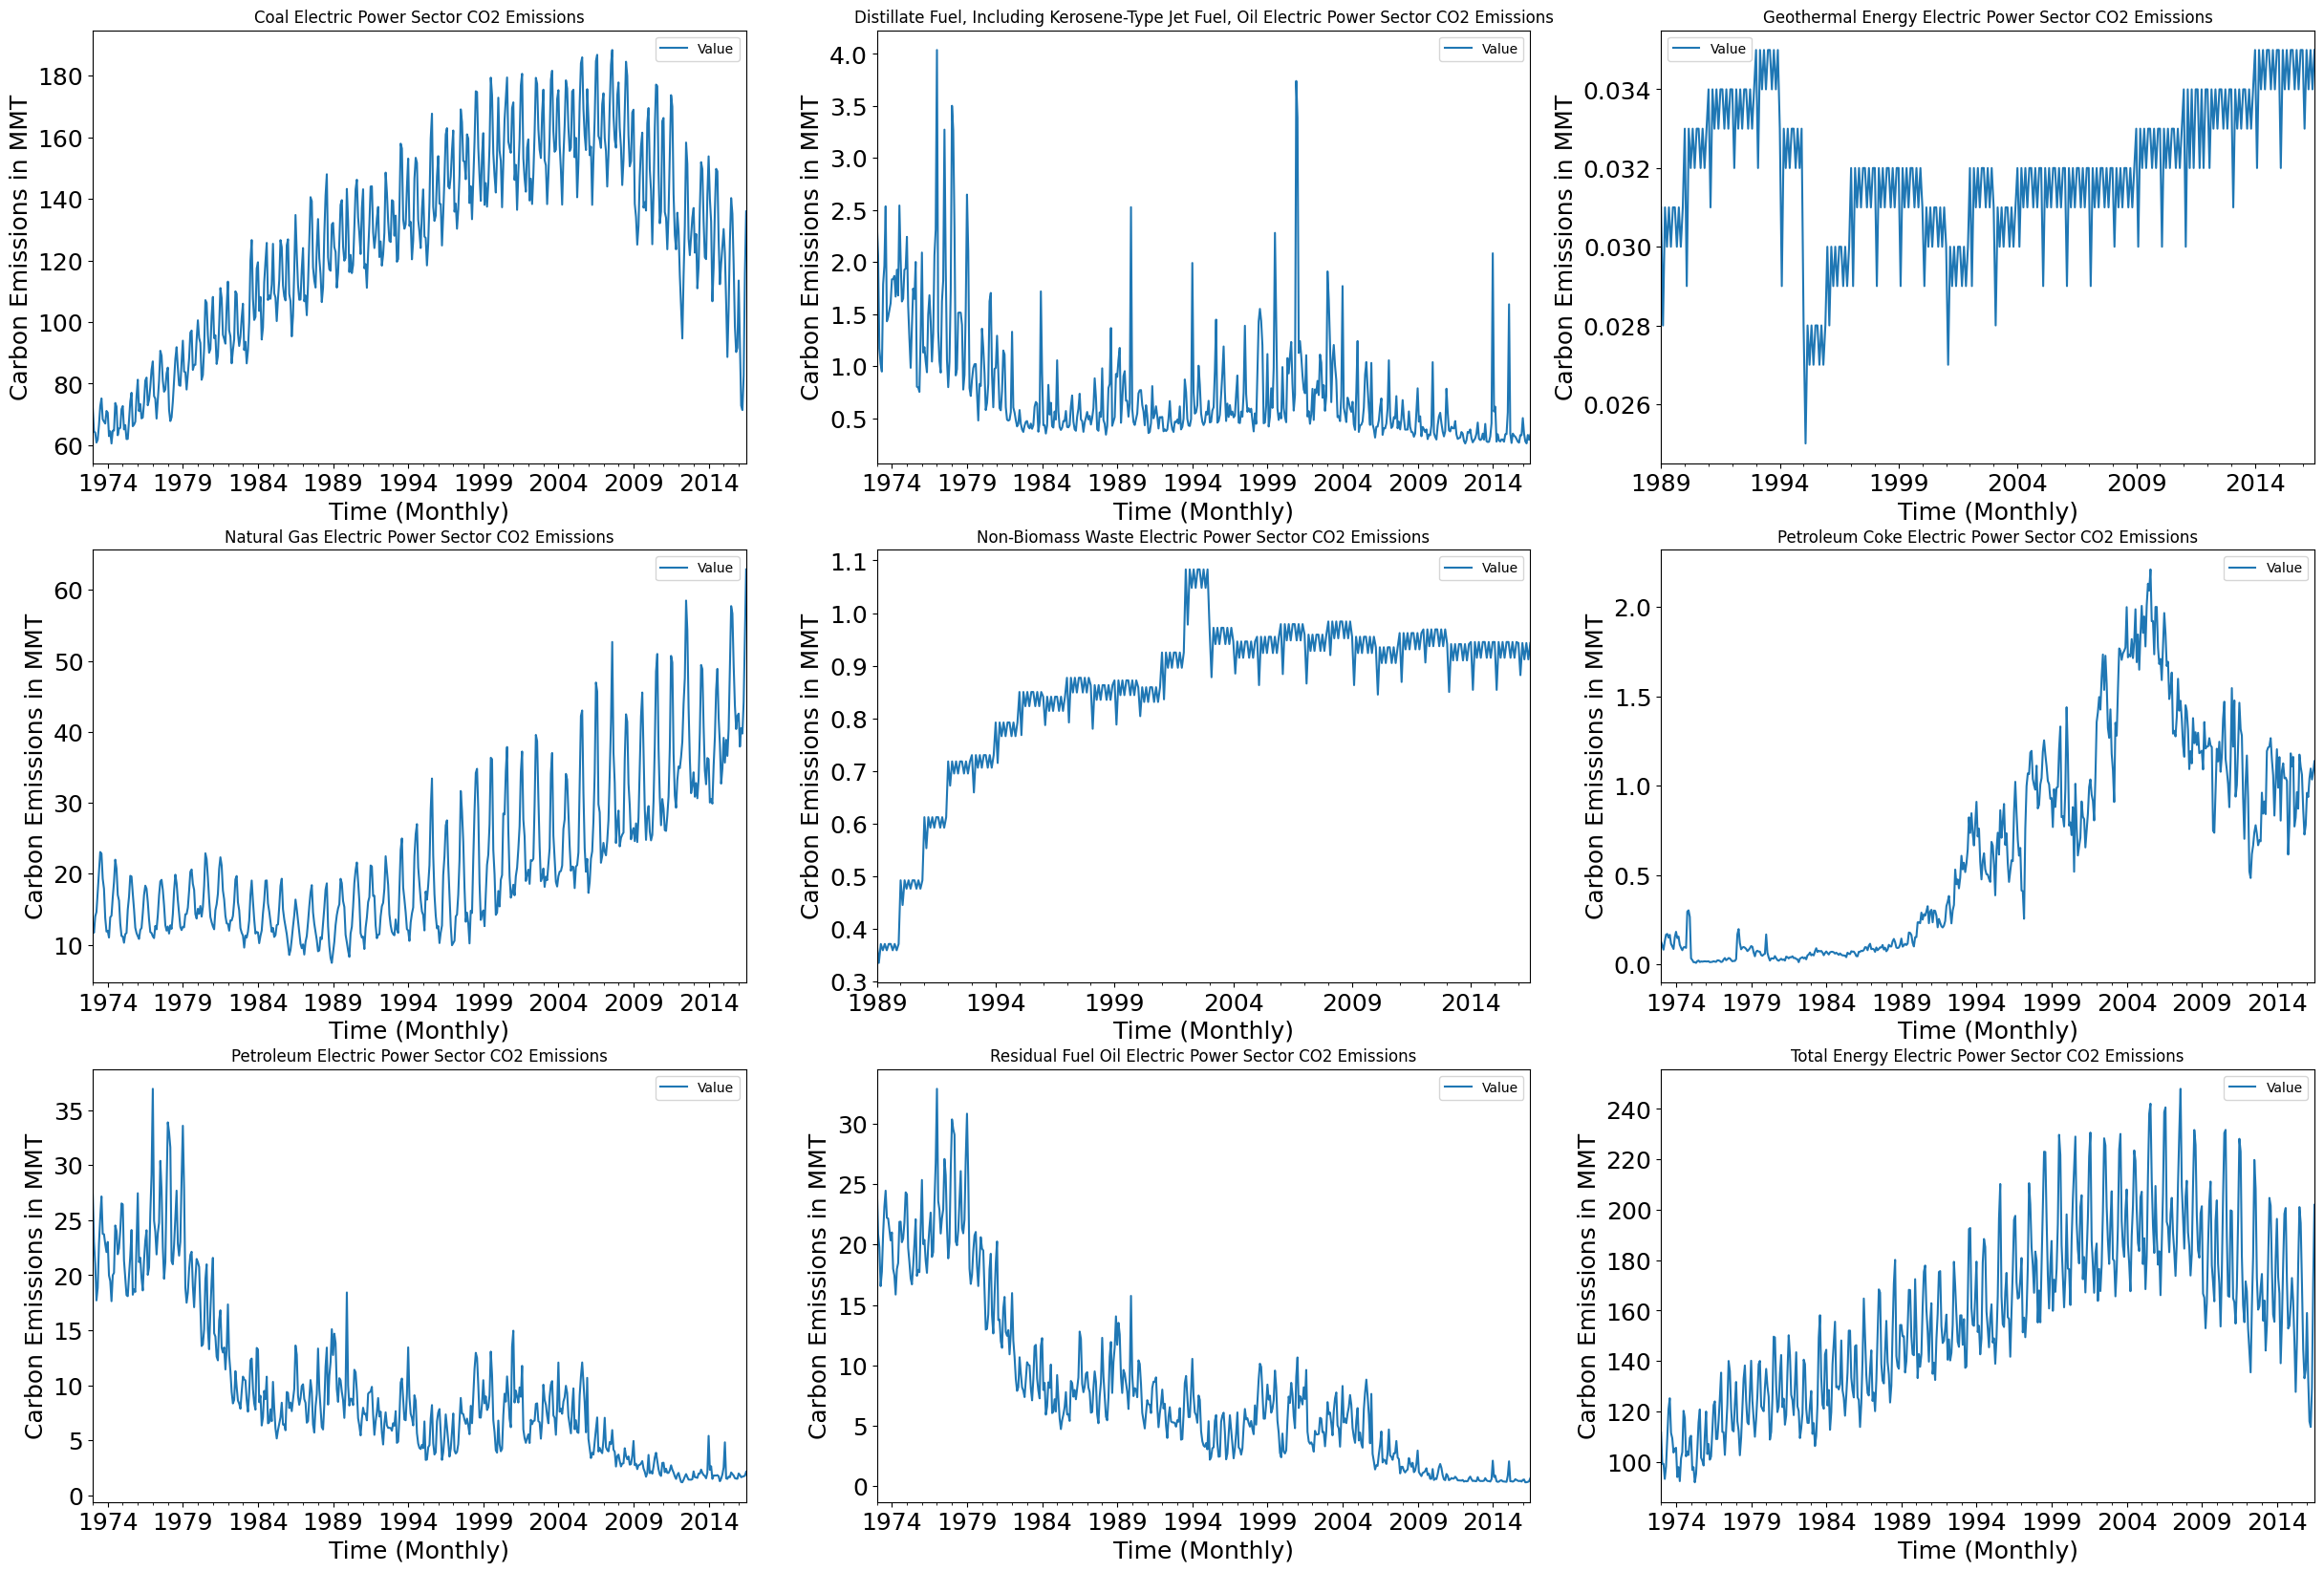

In [19]:
# The CO2 emission time series dataset is ploted to visualize the dependency of the emission in the power generation with time.
# Setting up the plot as before
fig, axes = plt.subplots(3, 3, figsize=(30, 20))

# Loop through the groups and plot without specifying x=group.index
for (desc, group), ax in zip(Energy_sources, axes.flatten()):
    # Directly plot 'Value' against the index of each group
    group.plot(y='Value', ax=ax, title=desc, fontsize=18)

    # Setting labels and fonts as before
    ax.set_xlabel('Time (Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

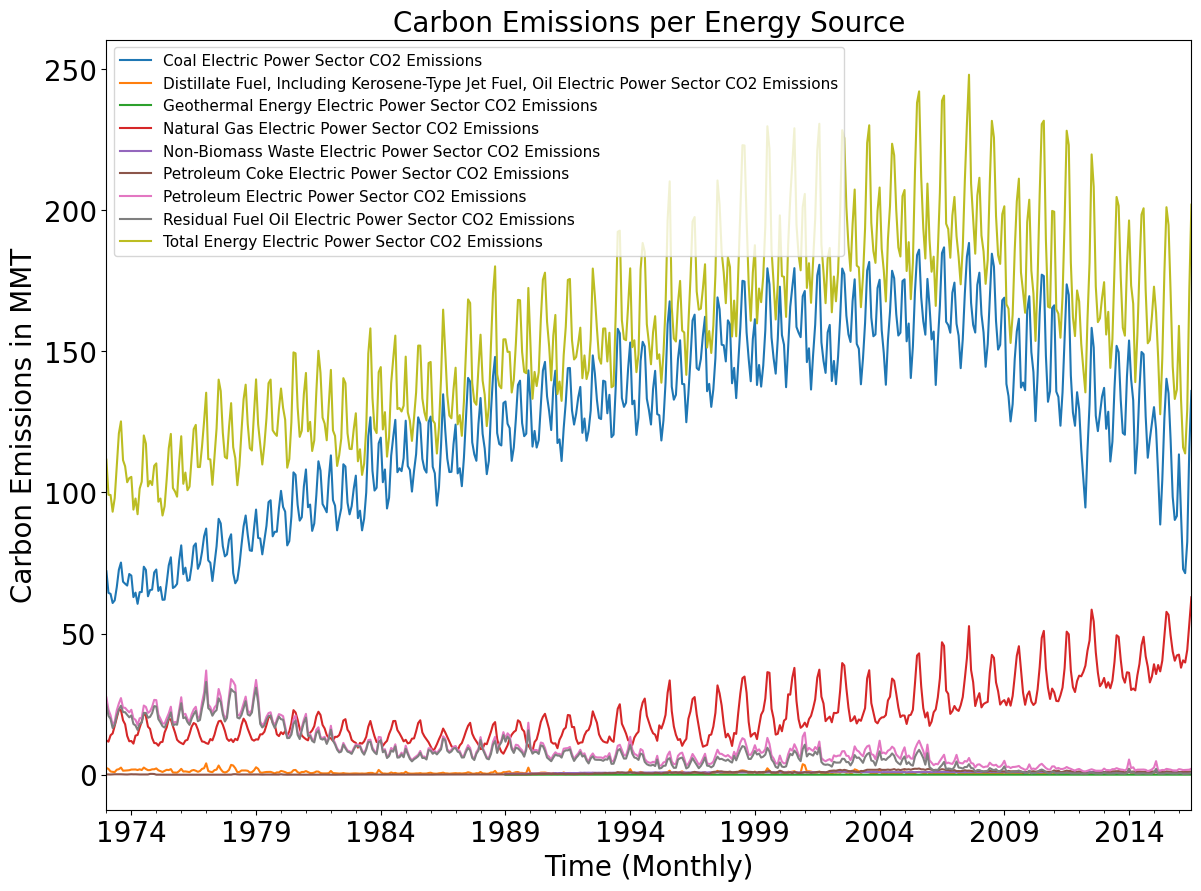

In [20]:
fig, ax = plt.subplots(figsize=(14, 10))  # You can adjust the figure size as needed

# Iterate through each group and plot it on the same axes object (ax)
for desc, group in Energy_sources:
    # Plot 'Value' against the index of each group, specifying label for legend
    group.plot(y='Value', label=desc, ax=ax, fontsize=20)

    # Setting labels and fonts
    ax.set_xlabel('Time (Monthly)', fontsize=20)
    ax.set_ylabel('Carbon Emissions in MMT', fontsize=20)

# It's better to set the title and legend once, outside the loop
ax.set_title('Carbon Emissions per Energy Source', fontsize=20)
ax.legend(fontsize=11)

In recent years, the natural gas consumption has been increasing. However, the use of coal for power generation has been declining. The plots of CO2 emissions from coal and natural gas show this trend, while declining the CO2 contribution from coal, there is an increment in the contribution of CO2 emission from natural gas.

In [21]:
# Bar chart of CO2 Emissions per energy source

In [22]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()

In [23]:
CO2_per_source.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [24]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

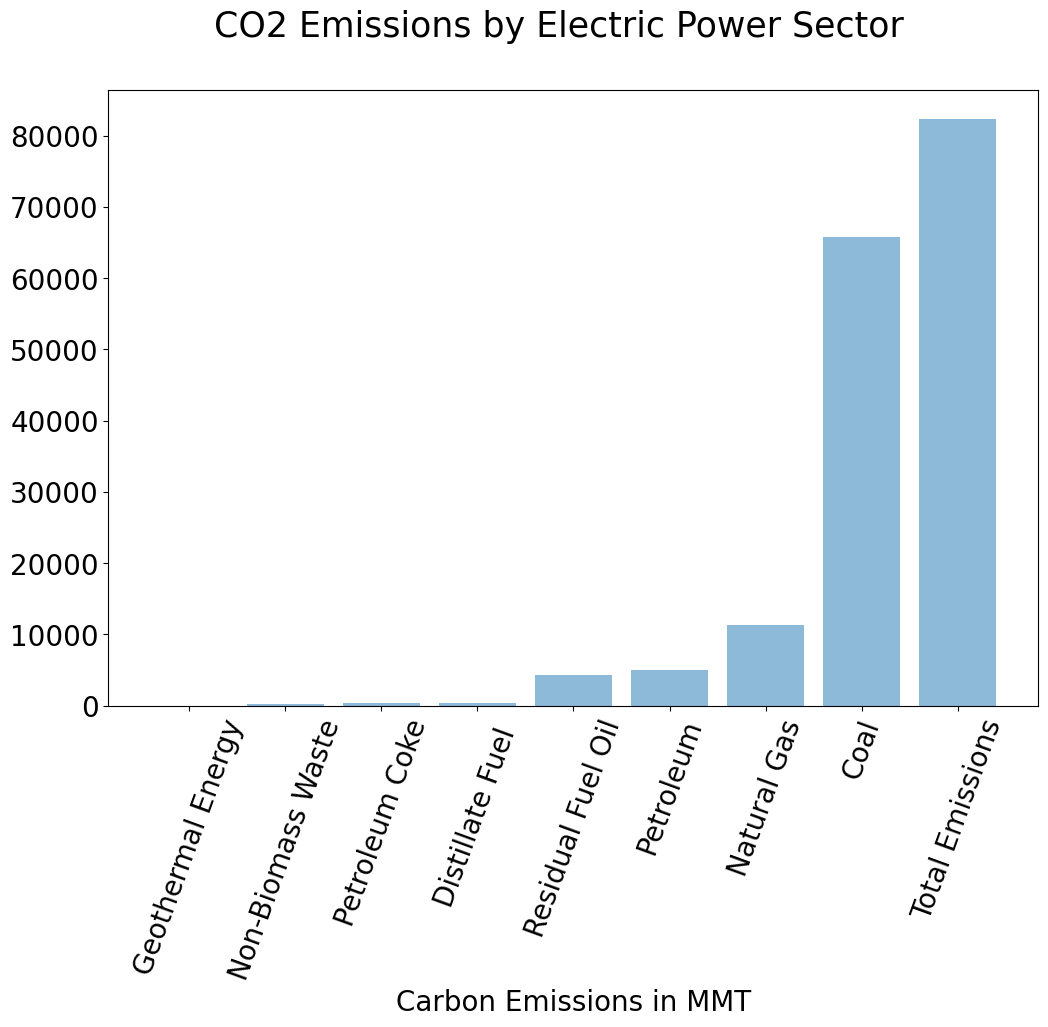

In [25]:
fig = plt.figure(figsize = (12,8))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

In [ ]:
#From the bar chart, we can see that the contribution of coal to the total CO2 emission is significant followed by natural gas.

In [26]:
# Coal Electric Power Sector CO2 Emissions analysis

In [27]:
Emissions = ts.iloc[:, 1:]  # Selecting columns after the first one assuming first column is 'Date' or similar

# Group by 'Description' and also group by month using pd.Grouper
Emissions = Emissions.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level=0)

# Accessing specific emissions data
mte = Emissions['Coal Electric Power Sector CO2 Emissions']  # Monthly total emissions (mte)
mte.head()


YYYYMM
1973-01-31    72.076
1973-02-28    64.442
1973-03-31    64.084
1973-04-30    60.842
1973-05-31    61.798
Freq: M, Name: Coal Electric Power Sector CO2 Emissions, dtype: float64

In [28]:
# Test Stationary

In [29]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

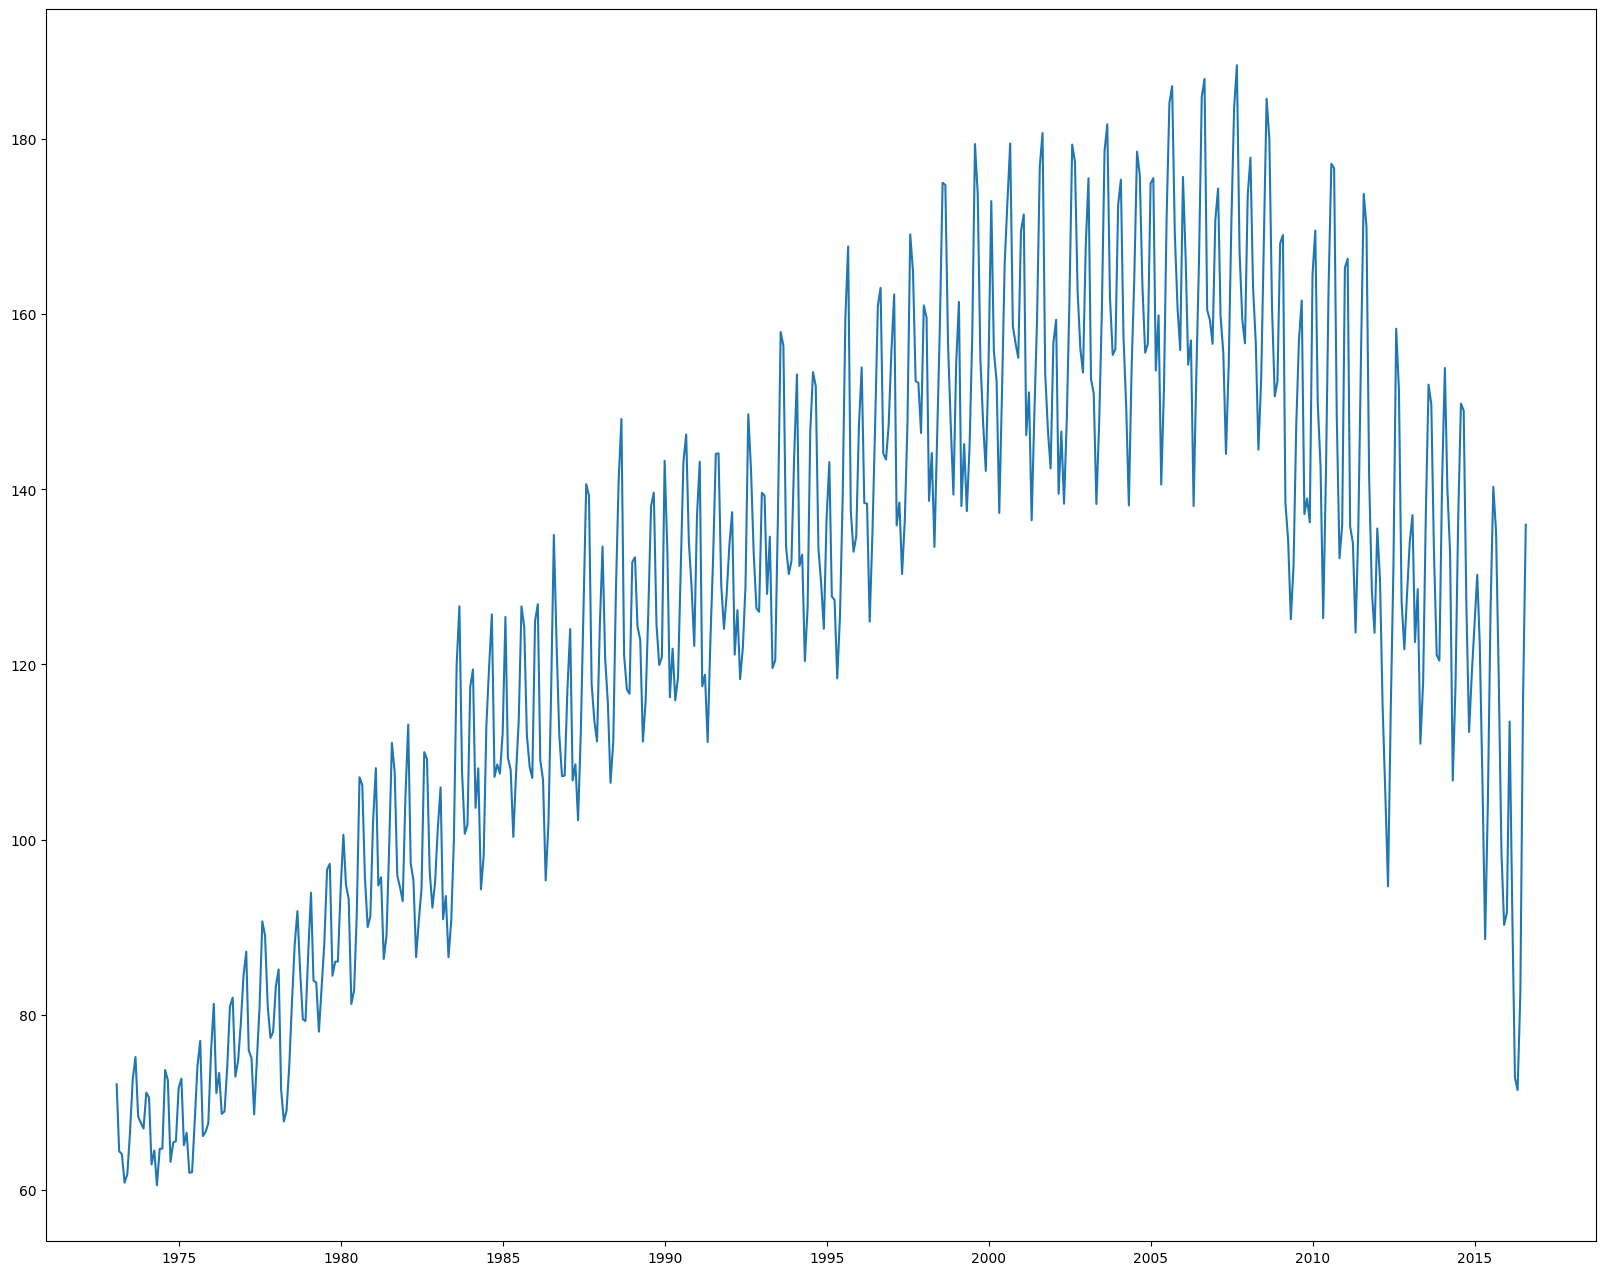

In [30]:
plt.plot(mte)

From the figures, it is evident that there is a trend in the CO2 emission dataset with seasonal variation. So, we can infer a concluding remark that the dataset is not stationary.

In [31]:
# Transform the dataset to stationary - Moving Average

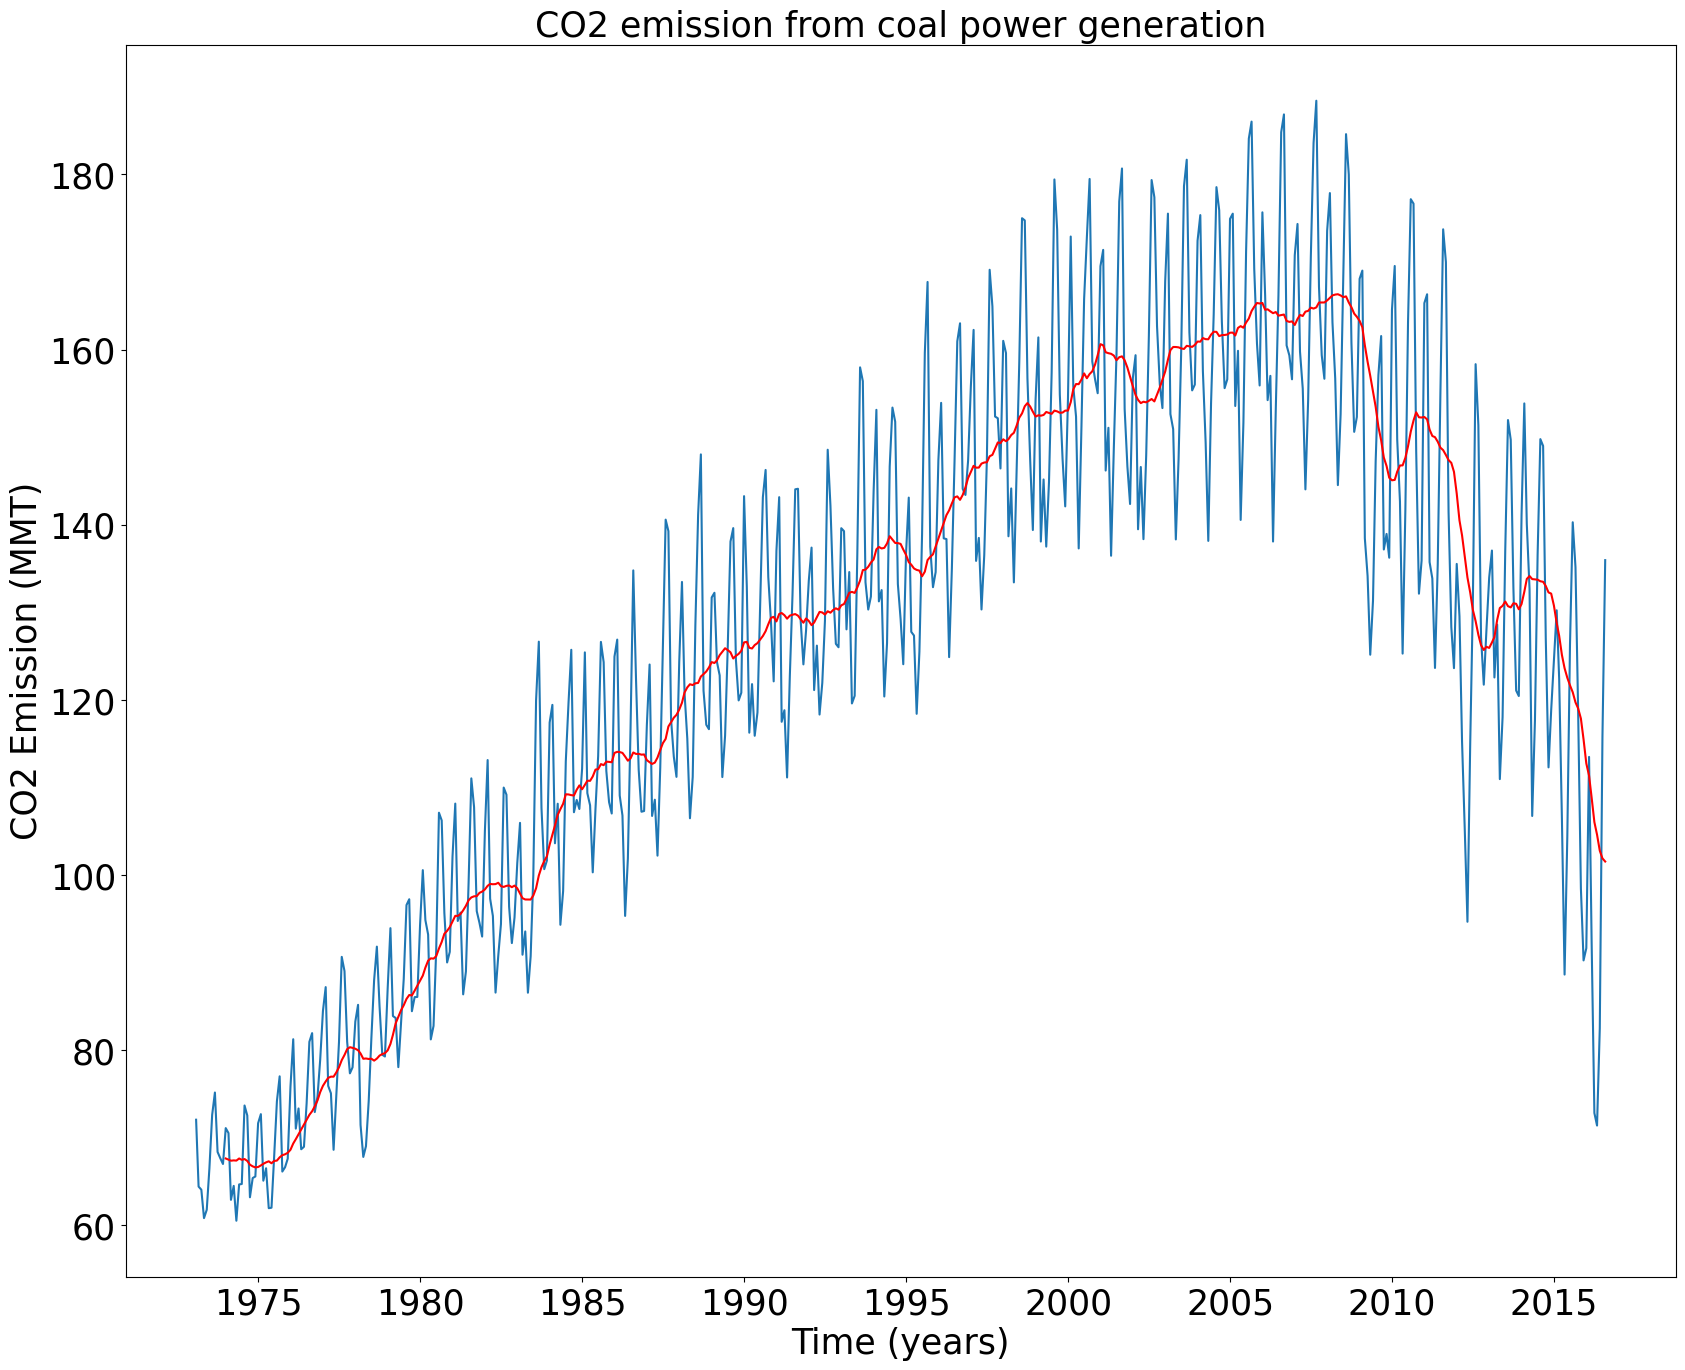

In [44]:
moving_avg = mte.rolling(12).mean()
plt.plot(mte)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission from coal power generation', fontsize = 25)
plt.show()

The red line shows the rolling mean. Subtract the moving average from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values.

In [33]:
mte_moving_avg_diff = mte - moving_avg
mte_moving_avg_diff.head(13)

YYYYMM
1973-01-31         NaN
1973-02-28         NaN
1973-03-31         NaN
1973-04-30         NaN
1973-05-31         NaN
1973-06-30         NaN
1973-07-31         NaN
1973-08-31         NaN
1973-09-30         NaN
1973-10-31         NaN
1973-11-30         NaN
1973-12-31    3.468750
1974-01-31    3.027917
Freq: M, Name: Coal Electric Power Sector CO2 Emissions, dtype: float64

The red line shows the rolling mean. Subtract the moving average from the original series.

In [34]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()

    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)

    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

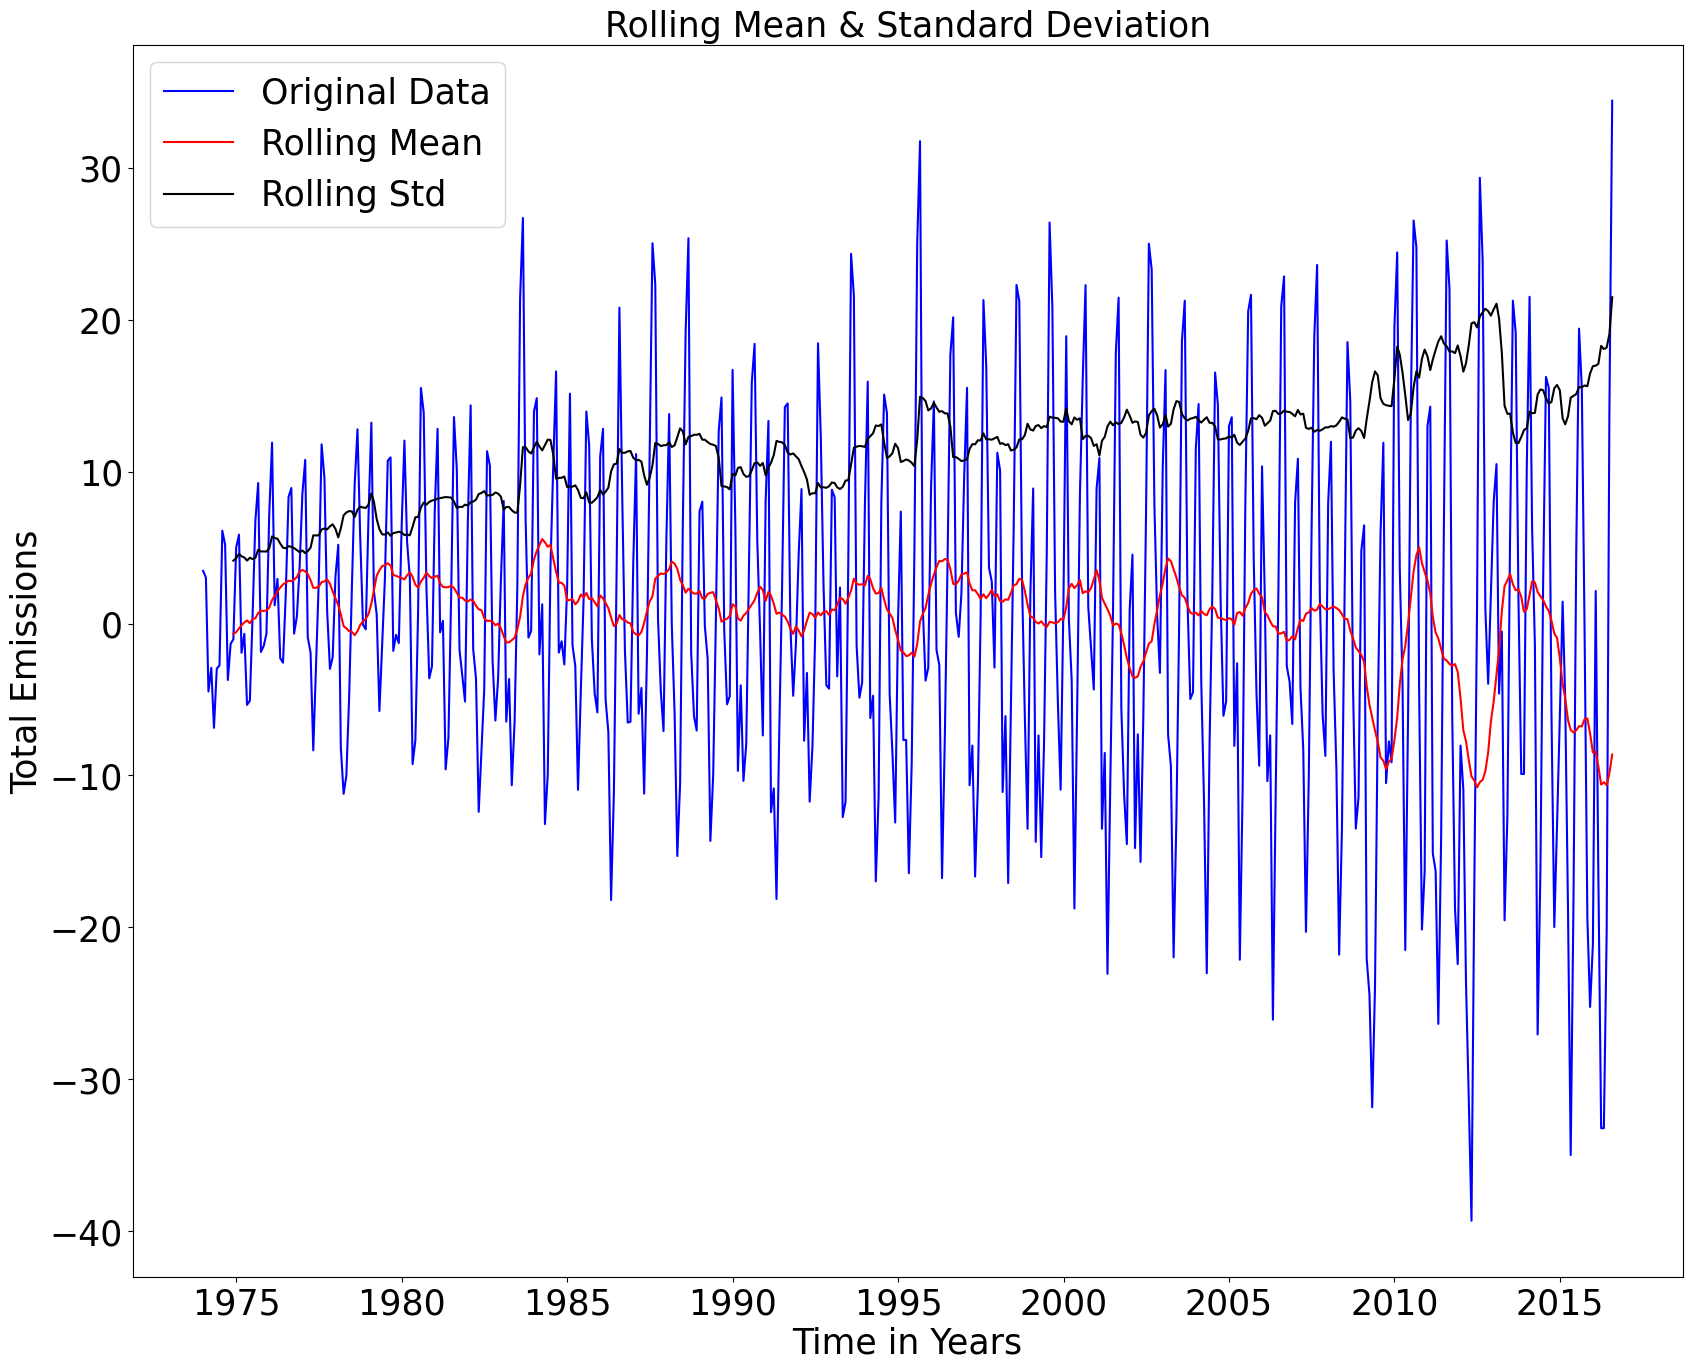

In [35]:
mte_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(mte_moving_avg_diff)

The rolling mean values appear to be varying slightly.

One of the most common method of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the original observation at a particular instant with that at the previous instant. This mostly works well to improve stationarity. First order differencing can be done as follows:

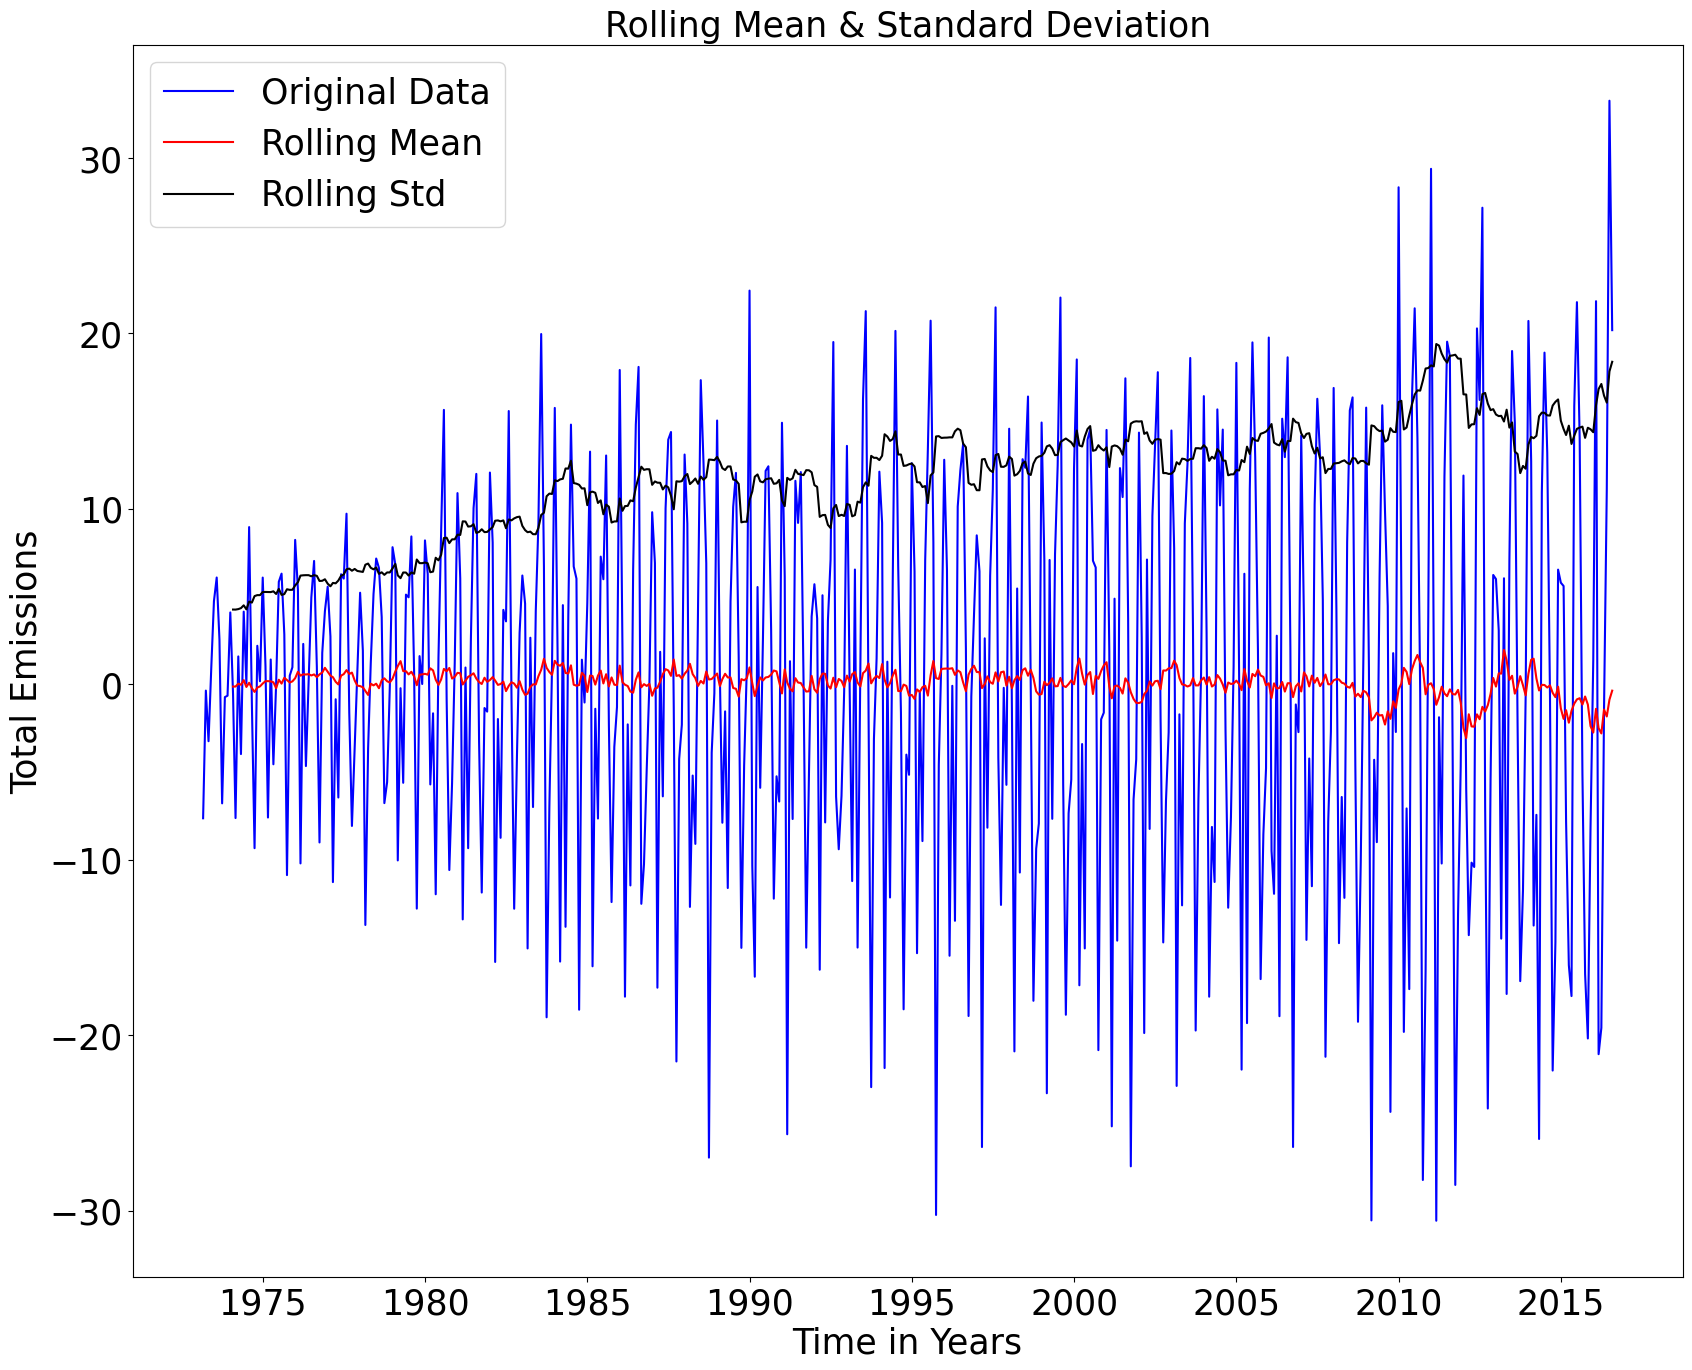

In [36]:
mte_first_difference = mte - mte.shift(1)
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

The first difference improves the stationarity of the series significantly. Let us use also the seasonal difference to remove the seasonality of the data and see how that impacts stationarity of the data.

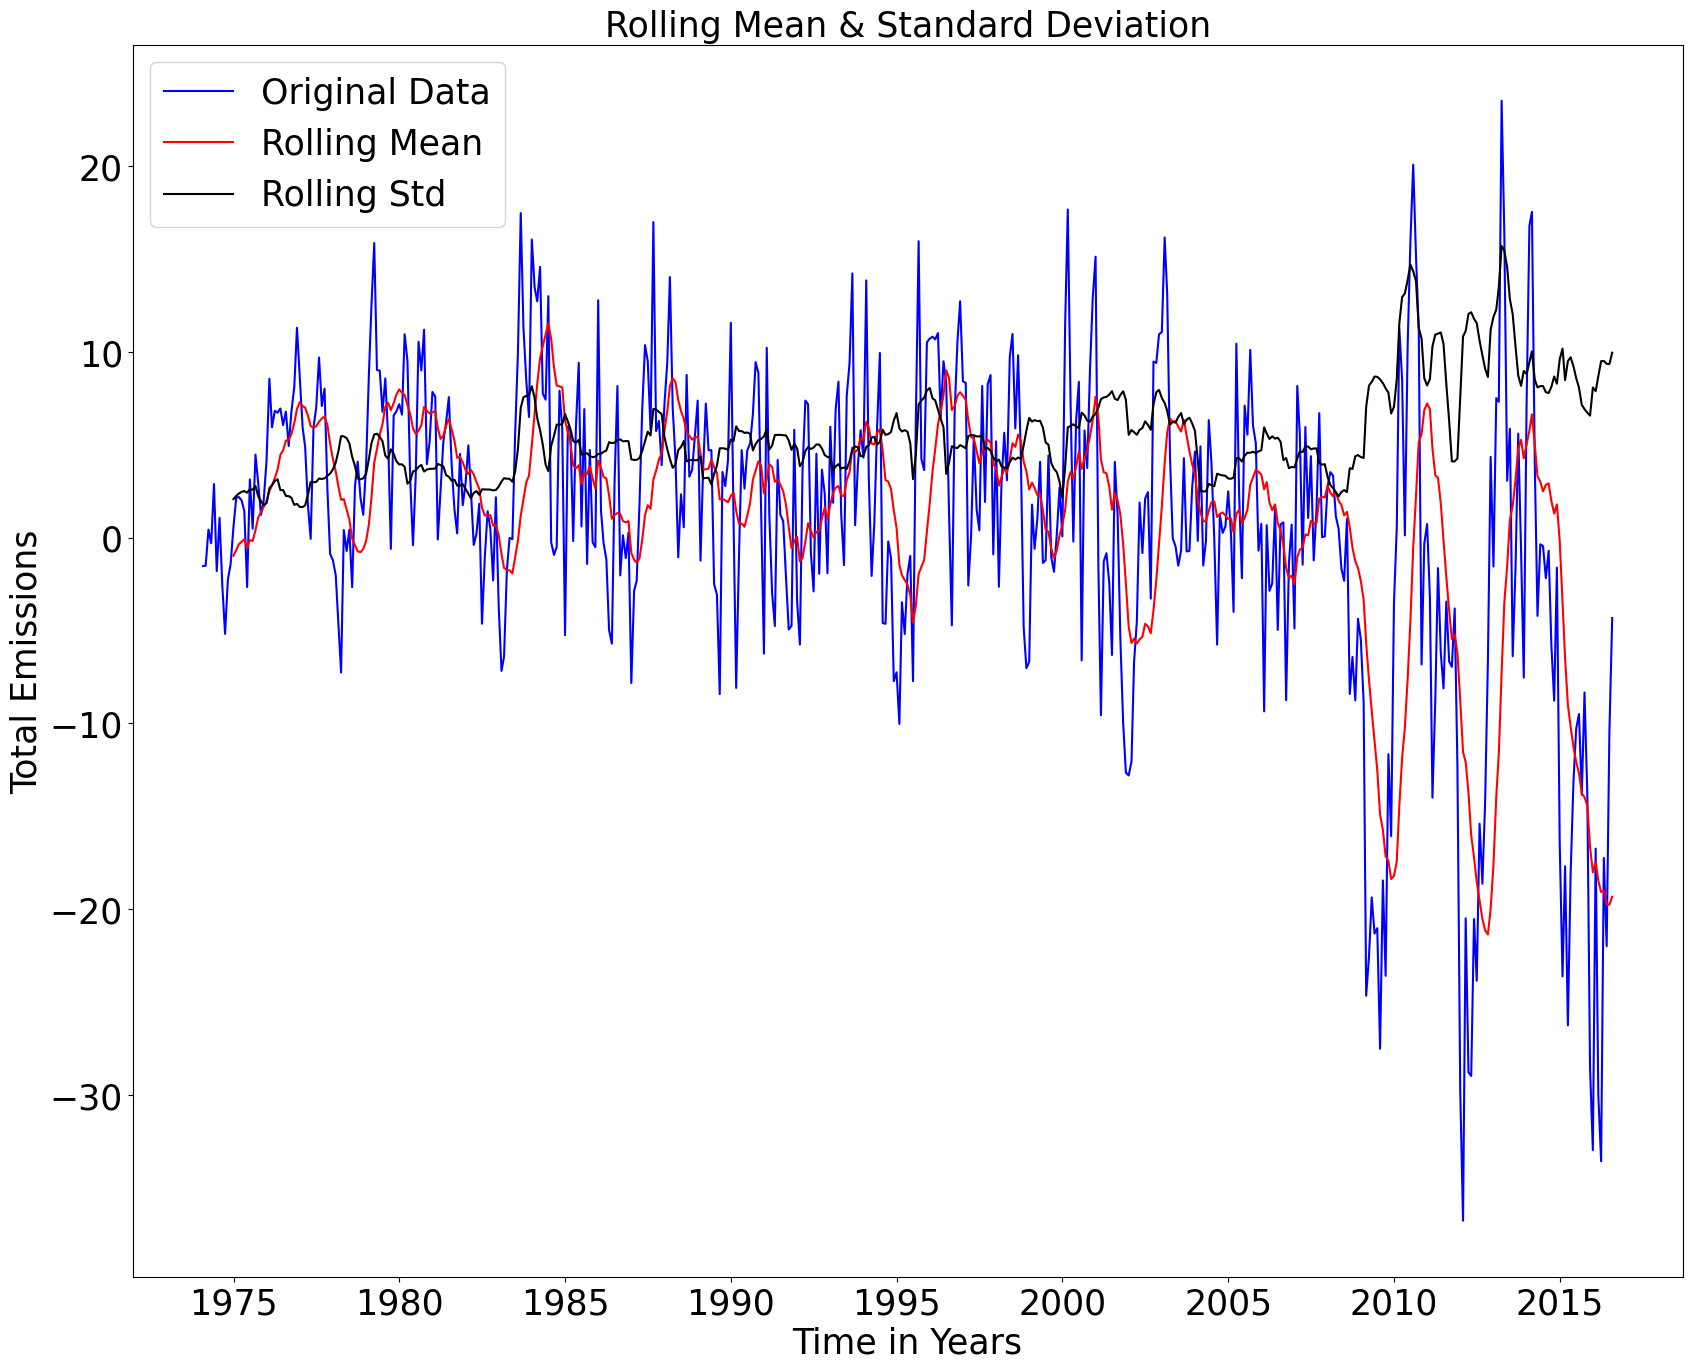

In [37]:
mte_seasonal_difference = mte - mte.shift(12)
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))

Compared to the original data the seasonal difference also improves the stationarity of the series. The next step is to take the first difference of the seasonal difference.

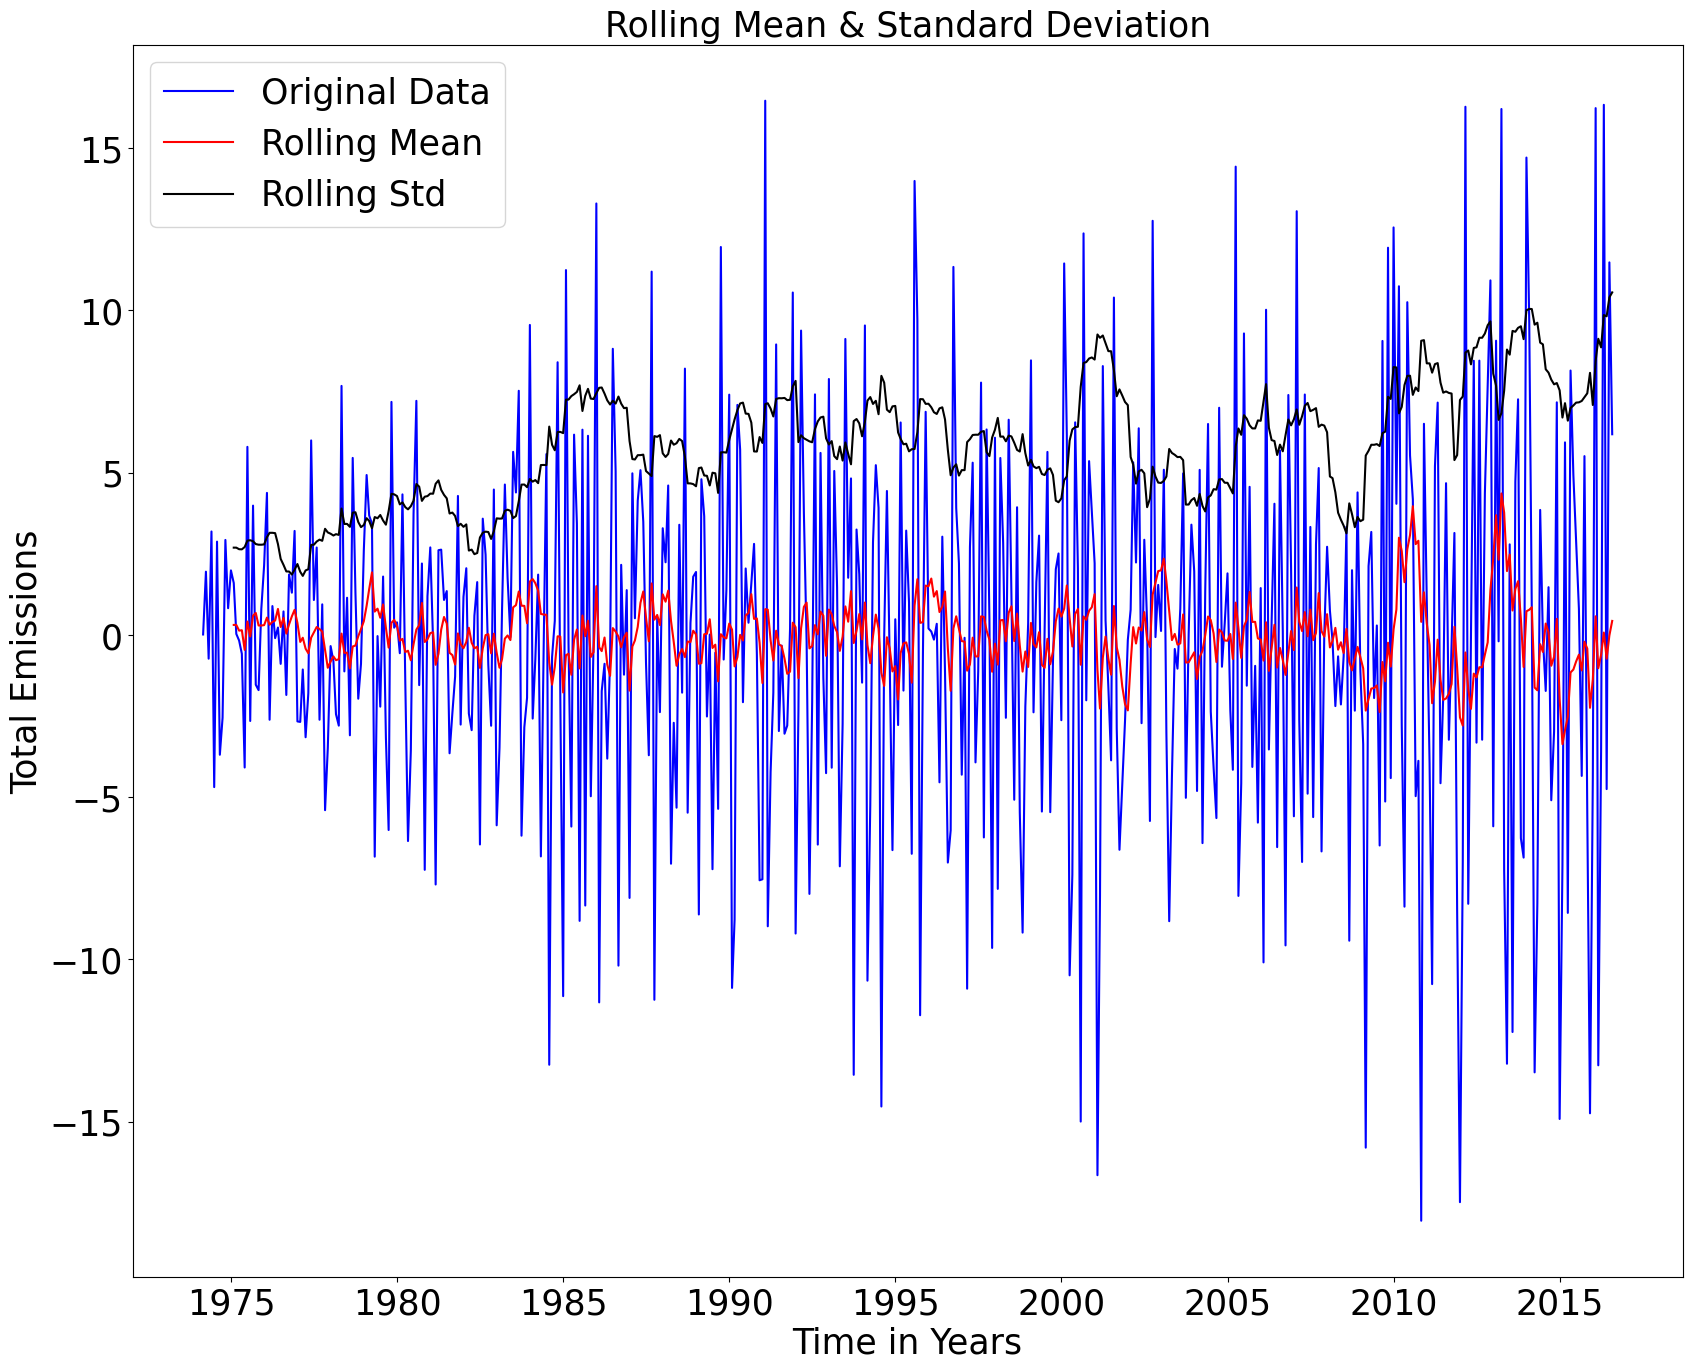

In [38]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

SARIMA(p,d,q)(P,D,Q)

Plot the ACF and PACF charts and find the optimal parameters

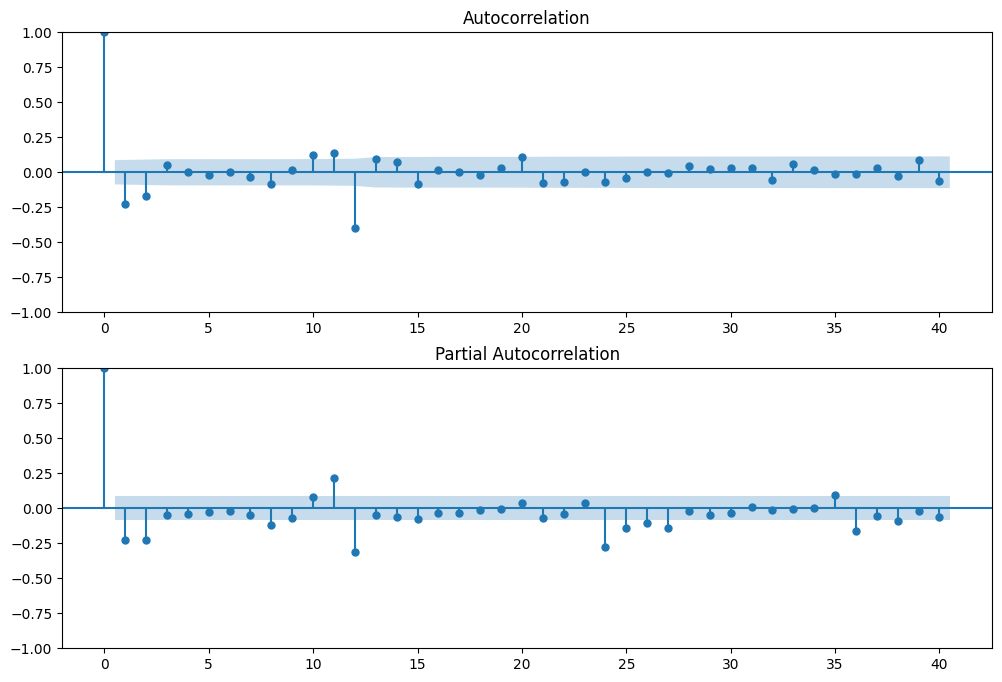

In [39]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [40]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [41]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
a=[]
b=[]
c=[]
wf=pd.DataFrame()

In [43]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            a.append(param)
            b.append(param_seasonal)
            c.append(results.aic)
        except:
            continue
wf['pdq']=a
wf['pdq_x_QDQs']=b
wf['aic']=c
print(wf[wf['aic']==wf['aic'].min()])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6563.79623922923
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5777.923009654532
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3661.341269735811
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3587.8652725963802
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3669.084558144925
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3664.249483074582
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3594.1782204021893
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3589.861595144653
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5887.028556982368
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5167.546202303118
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3380.9982067753494
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3297.343449768583
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3394.6954073732445
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3368.4349052065545
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3310.6608152610447
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3299.8811773752177
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4046.0808611789744
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3650.7797651744227
AR

In [45]:
mod = sm.tsa.statespace.SARIMAX(mte,
                                order=(1,1,1),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                          SARIMAX Results                                           
Dep. Variable:     Coal Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                       SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1470.285
Date:                                      Thu, 14 Mar 2024   AIC                           2948.569
Time:                                              00:25:02   BIC                           2965.396
Sample:                                          01-31-1973   HQIC                          2955.174
                                               - 07-31-2016                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6117      0.049  

The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value close to 0, so it is reasonable to include the features in our model.

When fitting seasonal ARIMA models, it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

<Axes: xlabel='YYYYMM'>

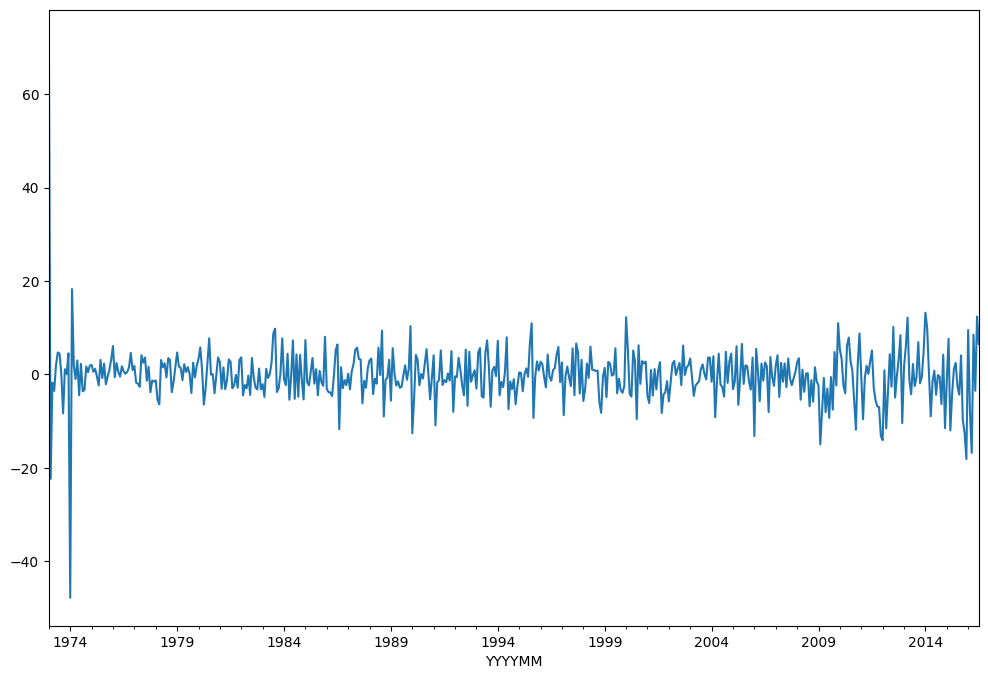

In [46]:
results.resid.plot(figsize=(12,8))

In [47]:
print(results.resid.describe())

count    523.000000
mean      -0.194550
std        6.087898
min      -47.783845
25%       -2.821641
50%       -0.153250
75%        2.613044
max       72.076000
dtype: float64


 Validating prediction

In [48]:
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

lower Coal Electric Power Sector CO2 Emissions  \
2013-01-31                                      126.260880   
2013-02-28                                      107.543168   
2013-03-31                                      107.283517   
2013-04-30                                      102.995648   
2013-05-31                                      113.108936   

            upper Coal Electric Power Sector CO2 Emissions  
2013-01-31                                      144.549163  
2013-02-28                                      125.831451  
2013-03-31                                      125.571800  
2013-04-30                                      121.283931  
2013-05-31                                      131.397219

The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

We can plot the real and forecasted values of the CO2 emission time series to assess how well the model fits.

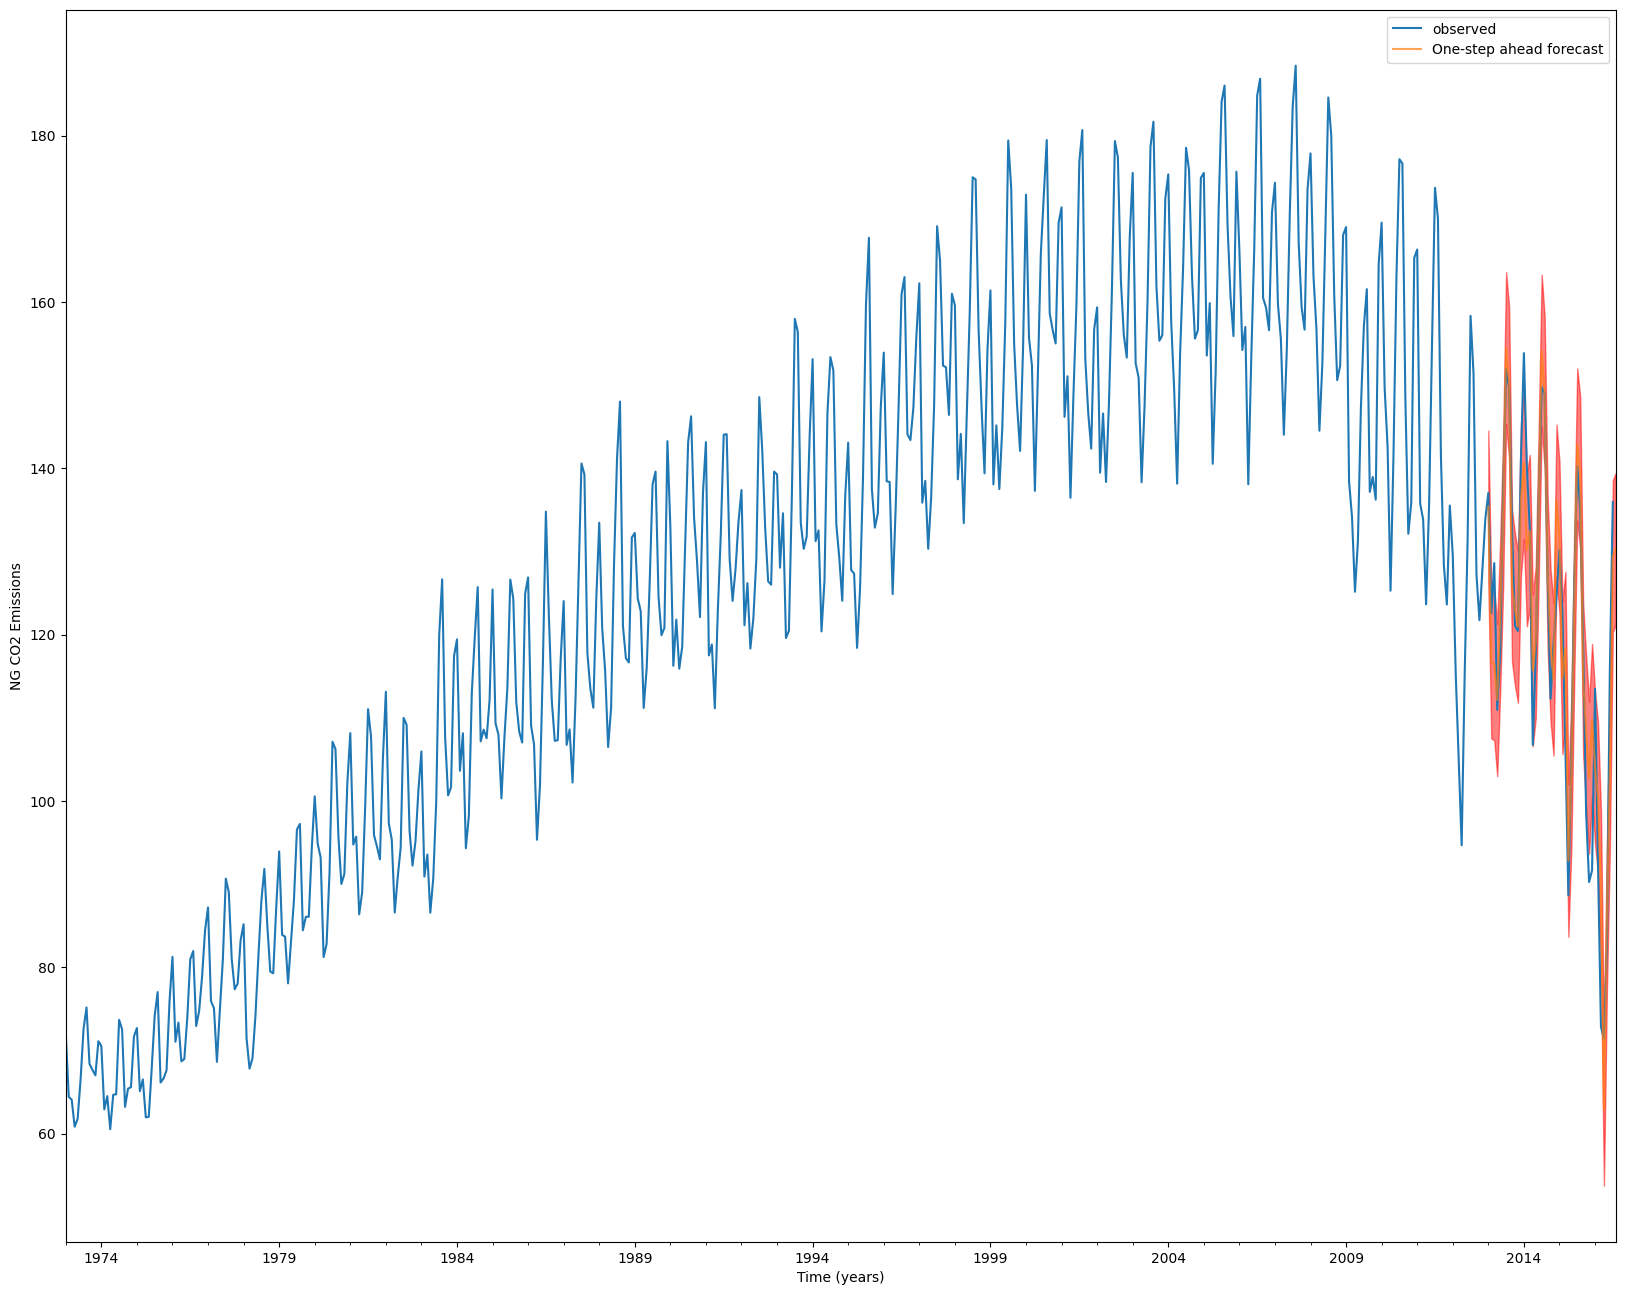

In [49]:
ax = mte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

In [50]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 56.41
The Root Mean Square Error (RMSE) of the forcast: nan


In [51]:
mte_pred_concat = pd.concat([mte_truth, mte_forecast])

In [52]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

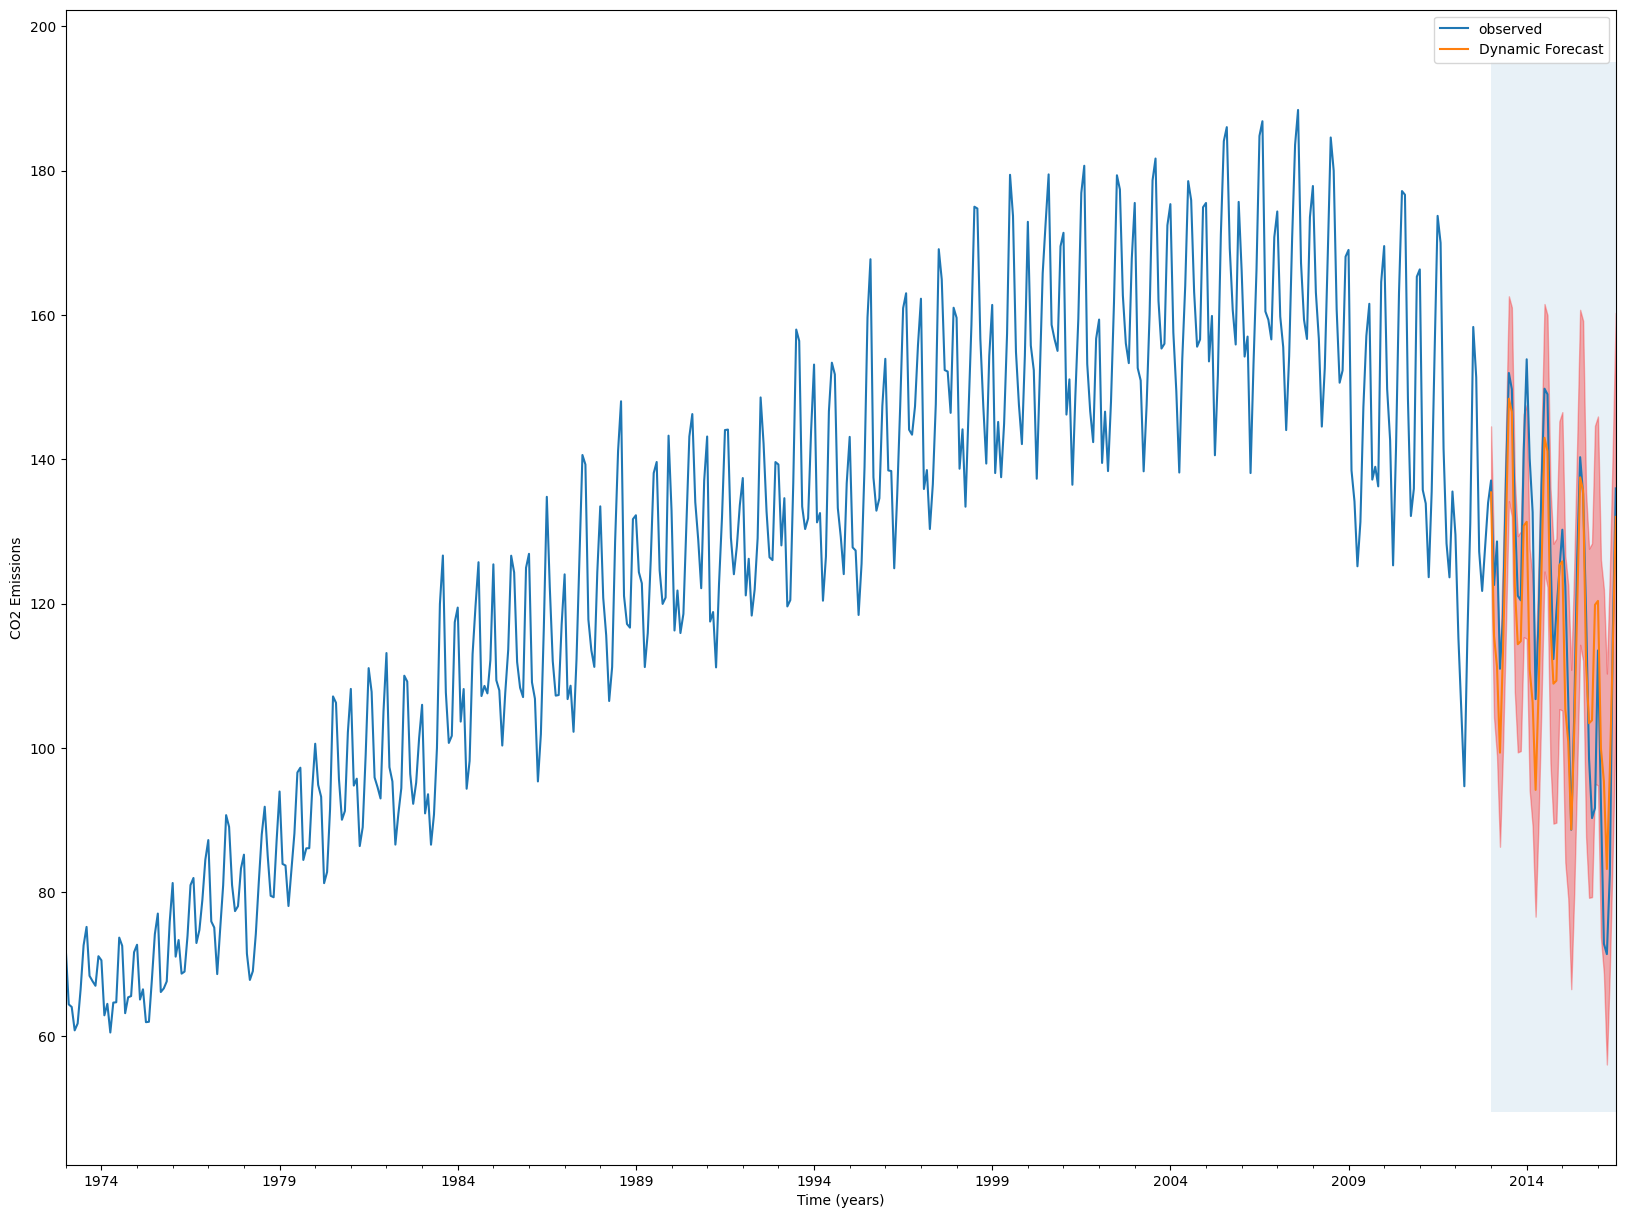

In [53]:
ax = mte['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1],
                color='r',
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(),
                 pd.to_datetime('2013-01-31'),
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [54]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 141.05
The Root Mean Square Error (RMSE) of the forcast: 11.8765


Forecast

In [55]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

lower Coal Electric Power Sector CO2 Emissions  \
2016-08-31                                      121.185869   
2016-09-30                                       96.233035   
2016-10-31                                       81.252374   
2016-11-30                                       79.176019   
2016-12-31                                       89.522087   

            upper Coal Electric Power Sector CO2 Emissions  
2016-08-31                                      139.474152  
2016-09-30                                      118.805345  
2016-10-31                                      105.996231  
2016-11-30                                      105.257015  
2016-12-31                                      116.548523

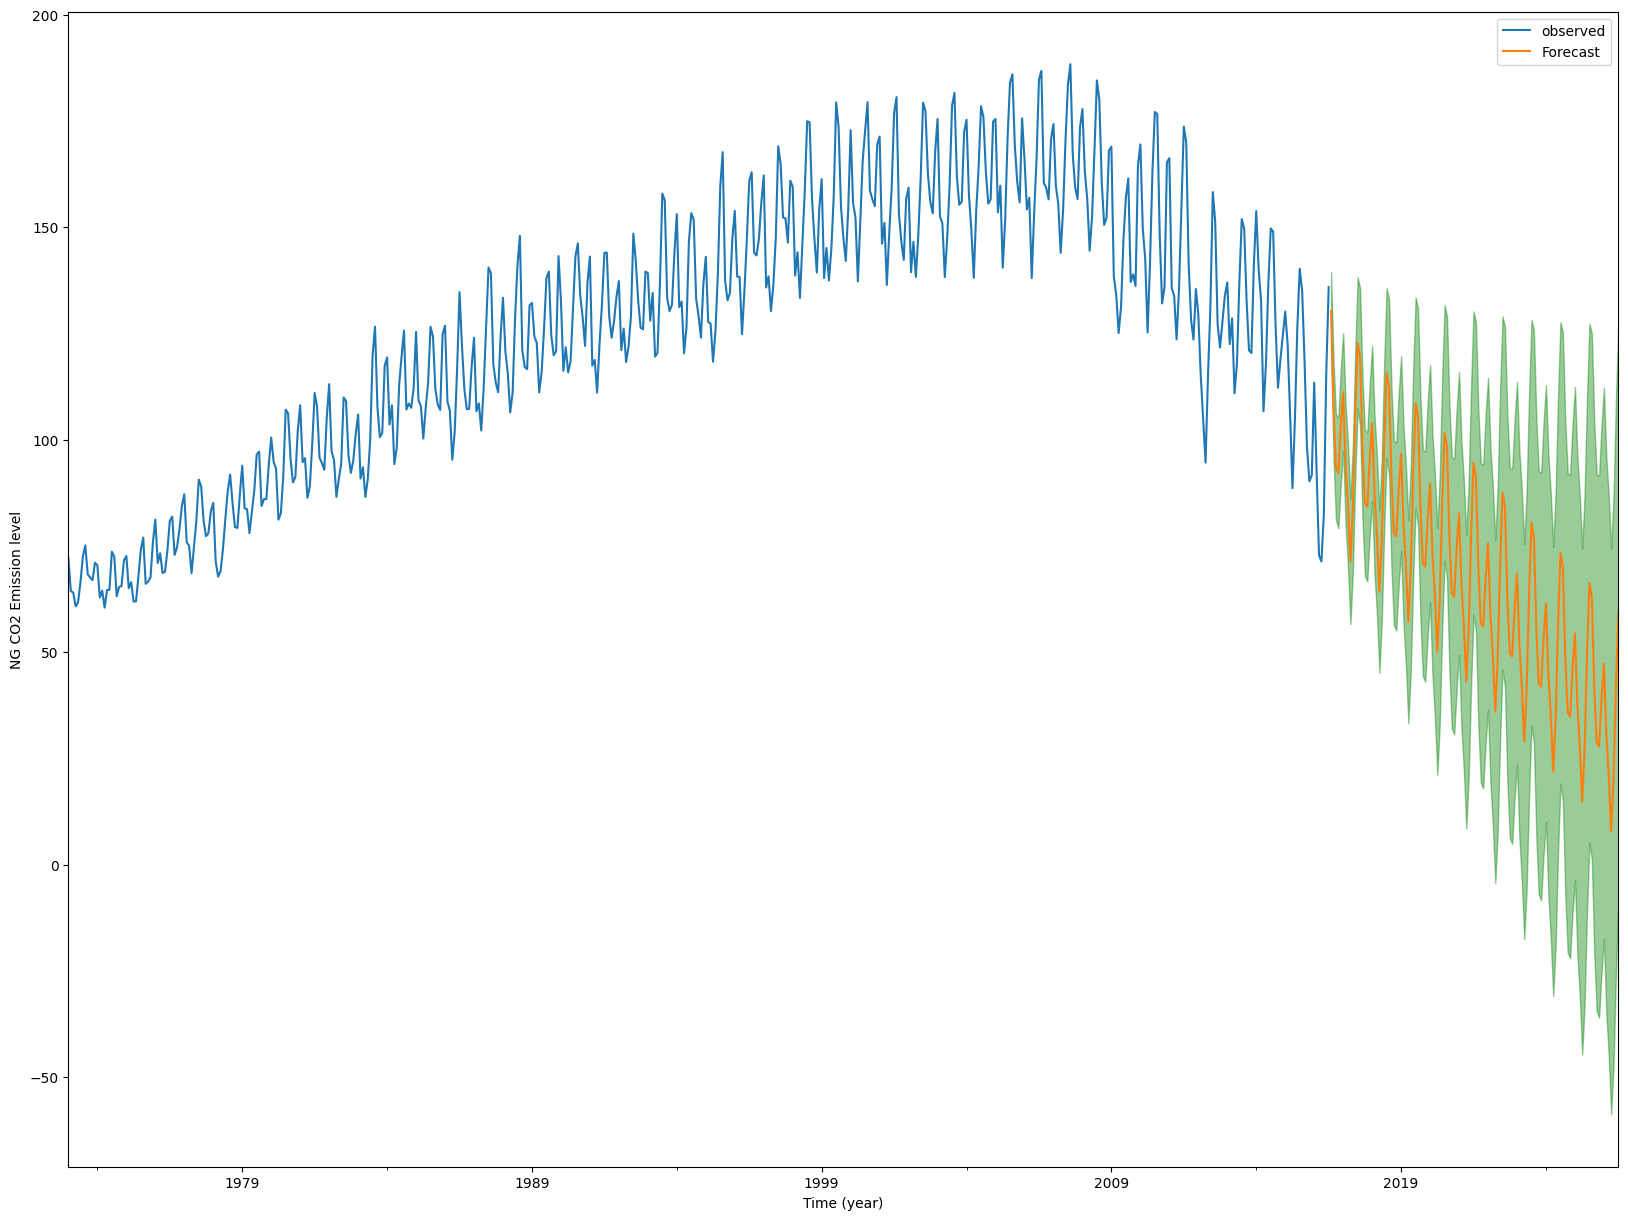

In [56]:
ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()

In [57]:
#ETS
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

trend_options = ["add", "mul"]
seasonal_options = ["add", "mul"]
seasonal_periods = 12

best_score, best_config = float("inf"), None

for trend in trend_options:
    for seasonal in seasonal_options:
        try:
            model_ets = ExponentialSmoothing(mte_moving_avg_diff,
                                             trend=trend,
                                             seasonal=seasonal,
                                             seasonal_periods=seasonal_periods).fit()
            predictions = model_ets.fittedvalues
            score = mean_squared_error(mte_moving_avg_diff, predictions, squared=False)  # RMSE

            if score < best_score:
                best_score, best_config = score, (trend, seasonal)
        except:
            continue

print(f"Best ETS Model: trend={best_config[0]}, seasonal={best_config[1]} with RMSE: {best_score}")

Best ETS Model: trend=add, seasonal=add with RMSE: 4.589952136082441


Calculated RMSE: 4.58976277187942


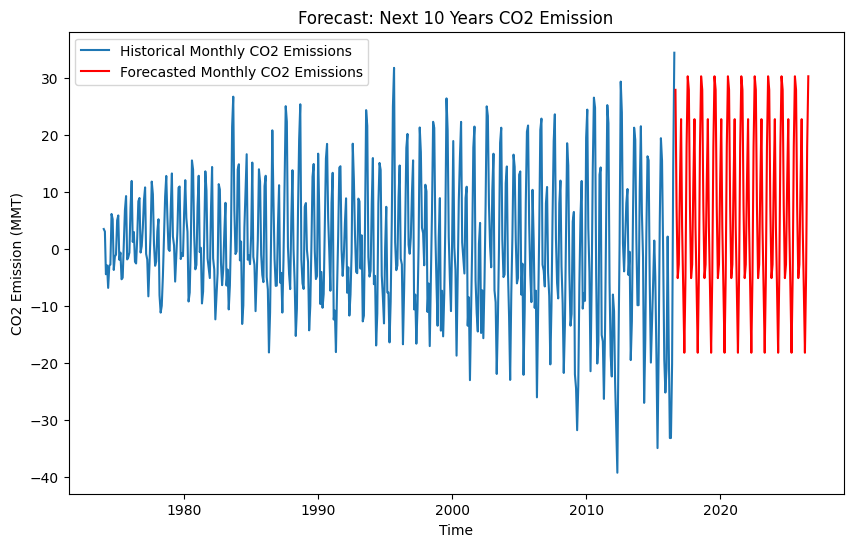

In [58]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Fit ETS model with identified best parameters
model_ets = ExponentialSmoothing(mte_moving_avg_diff,
                                 seasonal_periods=12,
                                 trend='add',
                                 seasonal='add',
                                 damped_trend=True).fit()  # Assuming damping might be beneficial

# Calculate fitted values
fitted_values = model_ets.fittedvalues

# Calculate RMSE on the training data
rmse = np.sqrt(mean_squared_error(mte_moving_avg_diff, fitted_values))
print(f"Calculated RMSE: {rmse}")

# Ensure the RMSE matches your best model's RMSE
# If not, you might need to recheck the preprocessing and model fitting steps

# Forecasting for the next 10 years (120 steps)
forecast_ets = model_ets.forecast(steps=120)

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(mte_moving_avg_diff.index, mte_moving_avg_diff, label='Historical Monthly CO2 Emissions')
plt.plot(forecast_ets.index, forecast_ets, label='Forecasted Monthly CO2 Emissions', color='red')
plt.title('Forecast: Next 10 Years CO2 Emission')
plt.xlabel('Time')
plt.ylabel('CO2 Emission (MMT)')
plt.legend()
plt.show()